In [25]:
import yfinance as yf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean
import talib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
BTC_df=yf.download("BTC-USD", start="2014-09-17", end="2020-01-17", index_col='Date', parse_dates=True)
BTC_df

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17   465.864014   468.174011   452.421997   457.334015   457.334015   
2014-09-18   456.859985   456.859985   413.104004   424.440002   424.440002   
2014-09-19   424.102997   427.834991   384.532013   394.795990   394.795990   
2014-09-20   394.673004   423.295990   389.882996   408.903992   408.903992   
2014-09-21   408.084991   412.425995   393.181000   398.821014   398.821014   
...                 ...          ...          ...          ...          ...   
2020-01-12  8033.261719  8200.063477  8009.059082  8192.494141  8192.494141   
2020-01-13  8189.771973  8197.788086  8079.700684  8144.194336  8144.194336   
2020-01-14  8140.933105  8879.511719  8140.933105  8827.764648  8827.764648   
2020-01-15  8825.343750  8890.117188  8657.187500  8807.010742  8807.010742   
2020-01-16  8812.481445  8846.460938  8612.095703  8723.786133  8723.786133   

                 Volume  
Date                     
2014-09-17     21056800  
2014-09-18     34483200  
2014-09-19     37919700  
2014-09-20     36863600  
2014-09-21     26580100  
...                 ...  
2020-01-12  22903438381  
2020-01-13  22482910687  
2020-01-14  44841784107  
2020-01-15  40102834649  
2020-01-16  31313981930  

[1948 rows x 6 columns]

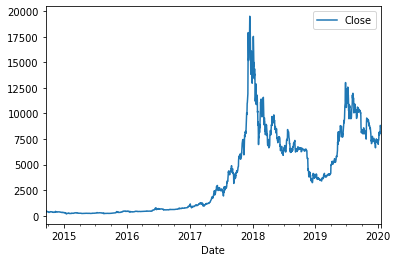

In [27]:
btc_price_df = BTC_df[['Close']]
btc_price_df.plot()

In [28]:
btc_price_df['returns'] = 100*btc_price_df['Close'].pct_change()
btc_price_df

Close   returns
Date                             
2014-09-17   457.334015       NaN
2014-09-18   424.440002 -7.192558
2014-09-19   394.795990 -6.984265
2014-09-20   408.903992  3.573492
2014-09-21   398.821014 -2.465854
...                 ...       ...
2020-01-12  8192.494141  1.927911
2020-01-13  8144.194336 -0.589562
2020-01-14  8827.764648  8.393345
2020-01-15  8807.010742 -0.235098
2020-01-16  8723.786133 -0.944981

[1948 rows x 2 columns]

In [29]:
macd, macdsignal, macdhist = talib.MACD(btc_price_df['Close'])
btc_price_df['MACD_hist'] = macdhist

In [30]:
btc_price_df.loc[(btc_price_df['MACD_hist'] > 0), 'action'] = 1
btc_price_df.loc[(btc_price_df['MACD_hist'] < 0), 'action'] = -1
btc_price_df.loc[(btc_price_df['MACD_hist'] == 0), 'action'] = 0

In [31]:
btc_price_df["action"] = btc_price_df['action'].shift(1)

In [32]:
btc_price_df

Close   returns   MACD_hist  action
Date                                                 
2014-09-17   457.334015       NaN         NaN     NaN
2014-09-18   424.440002 -7.192558         NaN     NaN
2014-09-19   394.795990 -6.984265         NaN     NaN
2014-09-20   408.903992  3.573492         NaN     NaN
2014-09-21   398.821014 -2.465854         NaN     NaN
...                 ...       ...         ...     ...
2020-01-12  8192.494141  1.927911   95.552358     1.0
2020-01-13  8144.194336 -0.589562   84.977268     1.0
2020-01-14  8827.764648  8.393345  116.380679     1.0
2020-01-15  8807.010742 -0.235098  127.235602     1.0
2020-01-16  8723.786133 -0.944981  120.365366     1.0

[1948 rows x 4 columns]

In [33]:
strategy_asset_returns = btc_price_df['action'] * btc_price_df['returns']

In [34]:
returns_cumsum = strategy_asset_returns.cumsum()

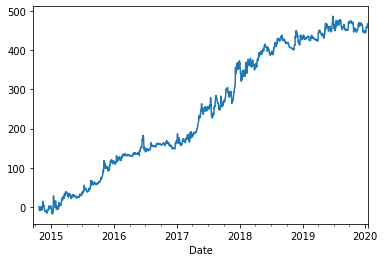

In [35]:
returns_cumsum.plot()

In [36]:
sharpe_ratio = strategy_asset_returns.mean()/strategy_asset_returns.std()
sharpe_ratio

0.06320585744137769

In [37]:
slowk, slowd = talib.STOCH(BTC_df['High'], BTC_df['Low'], BTC_df['Close'])
btc_price_df['stoch'] = slowd

In [38]:
btc_price_df.loc[(btc_price_df['stoch'] > 80), 'action'] = 1
btc_price_df.loc[(btc_price_df['stoch'] < 20), 'action'] = -1
btc_price_df.loc[(btc_price_df['stoch'] <= 80) & (btc_price_df['stoch'] >= 20), 'action'] = 0

In [39]:
strategy_asset_returns = btc_price_df['action'] * btc_price_df['returns']

In [40]:
returns_cumsum = strategy_asset_returns.cumsum()

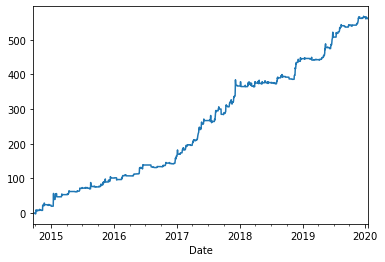

In [41]:
returns_cumsum.plot()

In [42]:
sharpe_ratio = strategy_asset_returns.mean()/strategy_asset_returns.std()
sharpe_ratio

0.12353919059276905